#**Montar directorio de Google drive** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Instalando dependencias**

In [4]:
#import os
#os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/ssh/tt-ia_models/src_colab')
#!pip install -r requirements_colab.txt
#!pip uninstall -y -r requirements_colab.txt

# **Imports**

In [2]:
import tensorflow as tf
#Imports para csv_utils
import os
import pandas as pd
import re
import time
#Imports para TF
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/ssh/tt-ia_models/src_colab')

# **Definiendo Paths**

In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/ssh/tt-ia_models/')
root_path = os.getcwd() #Path del directorio root
dataset_path = root_path + '/src/datasets/wheather-dataset/'
print(f'root_path: {root_path}')
print(f'dataset_path: {dataset_path}')

root_path: /content/drive/MyDrive/Colab Notebooks/git-repos/ssh/tt-ia_models
dataset_path: /content/drive/MyDrive/Colab Notebooks/git-repos/ssh/tt-ia_models/src/datasets/wheather-dataset/


# **CSV utils & Plot utils**

In [4]:
"""
 FECHA  PRECIP(mm)  EVAP(mm)  TMAX(°C)  TMIN(°C)
"""
def to_csv(list_content,filename,columns):
    COLUMNAS = columns
    town_df = pd.DataFrame(list_content,columns=COLUMNAS)
    town_df.to_csv('csv_dataset/' + filename + '.csv')

def get_csv_data(filename,param):
    #Lee el .csv
    df = pd.read_csv(filename)
    df.pop('Unnamed: 0')
    return df

def graph_data(dataFrame, param):
    dataFrame.plot(x='FECHA', y=param)
    plt.show()

In [ ]:
#Sección exclusiva para probar csv utils y plot utils

# **Obteniendo los nombres de los archivos csv a leer**

In [5]:
with open(root_path + '/src_colab/csv_towns_names.pickle', "rb") as a_file:
		FILES = pickle.load(a_file)
		print(FILES)
    

['14002-ACATLAN DE JUAREZ.csv', '14006-TEOCALTICHE.csv', '14009-AMECA.csv', '14011-LA HUERTA.csv', '14016-IXTLAHUACAN DE LOS MEMBRILLOS.csv', '14017-ATOTONILCO EL ALTO.csv', '14018-ATOYAC.csv', '14023-BOLAÑOS.csv', '14024-TOMATLAN.csv', '14026-COLOTLAN.csv', '14028-CIHUATLAN.csv', '14029-CONCEPCION DE BUENOS AIRES.csv', '14030-ZAPOTLAN EL GRANDE.csv', '14033-LAGOS DE MORENO.csv', '14034-TAMAZULA DE GORDIANO.csv', '14035-MASCOTA.csv', '14036-CUAUTITLAN DE GARCIA BARRAGAN.csv', '14037-HUEJUCAR.csv', '14038-SAN CRISTOBAL DE LA BARRANCA.csv', '14039-CUQUIO.csv', '14040-CHAPALA.csv', '14044-TALPA DE ALLENDE.csv', '14046-AUTLAN DE NAVARRO.csv', '14047-OCOTLAN.csv', '14052-TAPALPA.csv', '14053-HUEJUQUILLA EL ALTO.csv', '14056-SAN MARTIN HIDALGO.csv', '14059-CABO CORRIENTES.csv', '14060-ARANDAS.csv', '14063-ETZATLAN.csv', '14065-GUADALAJARA.csv', '14068-HOSTOTIPAQUILLO.csv', '14070-DEGOLLADO.csv', '14075-JAMAY.csv', '14076-JESUS MARIA.csv', '14078-JUCHITLAN.csv', '14080-YAHUALICA DE GONZALEZ G

# **Obteniendo datos**

In [6]:
df = get_csv_data(f"{dataset_path}/{FILES[0]}",'TMAX(°C)')
print(df)

           FECHA  PRECIP(mm)  EVAP(mm)  TMAX(°C)  TMIN(°C)
0     01/01/2008         0.0       4.1      27.7       9.7
1     02/01/2008         0.0       3.0      23.6       9.1
2     03/01/2008         0.0       2.6      26.6       8.5
3     04/01/2008         0.0       3.0      28.3       6.0
4     05/01/2008         0.0       3.0      27.9       6.6
...          ...         ...       ...       ...       ...
4013  27/12/2018         0.0       3.9      26.3       9.2
4014  28/12/2018         0.0       3.0      24.1       8.6
4015  29/12/2018         0.0       2.7      22.8       8.6
4016  30/12/2018         0.9       3.9      23.6       9.2
4017  31/12/2018         0.0       3.1      23.7      10.0

[4018 rows x 5 columns]


In [7]:
#print()
fecha = df.pop('FECHA')
print(fecha)

0       01/01/2008
1       02/01/2008
2       03/01/2008
3       04/01/2008
4       05/01/2008
           ...    
4013    27/12/2018
4014    28/12/2018
4015    29/12/2018
4016    30/12/2018
4017    31/12/2018
Name: FECHA, Length: 4018, dtype: object


# **Graficando datos**

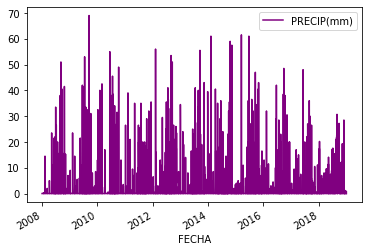

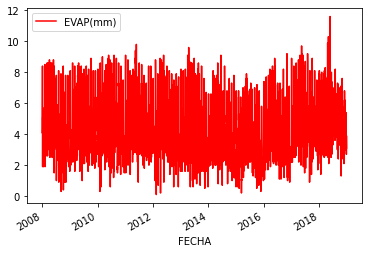

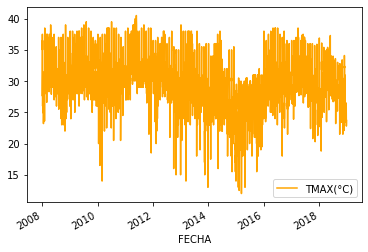

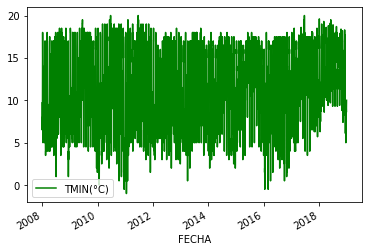

In [8]:
#Grafica los datos
date_time = pd.to_datetime(fecha)
plot_cols = ['PRECIP(mm)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(color='purple')

plot_cols = ['EVAP(mm)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(color='red')

plot_cols = ['TMAX(°C)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(color='orange')

plot_cols = ['TMIN(°C)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(color='green')

# **Dividiendo training y testing**

In [9]:
#df.pop('FECHA')  
train_tmax  = df['TMAX(°C)'][:len(df['TMAX(°C)'])-365]
train_tmin  = df['TMIN(°C)'][:len(df['TMAX(°C)'])-365]
train_precip = df['PRECIP(mm)'][:len(df['TMAX(°C)'])-365]
train_evap  = df['EVAP(mm)'][:len(df['TMAX(°C)'])-365]
test_tmax   = df.iloc[len(df['TMAX(°C)'])-365:]
test_tmin   = df.iloc[len(df['TMIN(°C)'])-365:]
test_precip = df.iloc[len(df['PRECIP(mm)'])-365:]
test_evap   = df.iloc[len(df['EVAP(mm)'])-365:]
print('Training dataset')
#print(train.reshape(len(df['TMAX(°C)'])-365, 4, 1))
arr = np.array(train_tmax)
re = np.reshape(arr,[len(arr),1])
print(re)
print(train_tmax.shape)
#print('Testing dataset')
#print(test)


Training dataset
[[27.7]
 [23.6]
 [26.6]
 ...
 [27.8]
 [27.7]
 [27.6]]
(3653,)


In [13]:
time_valid = date_time[len(df['TMAX(°C)'])-365:]

# **Windowed dataset**

In [17]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
 series = tf.expand_dims(series, axis=1)
 print(series)
 print(series.shape)
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size + 1))
 ds = ds.shuffle(shuffle_buffer)
 ds = ds.map(lambda w: (w[:-1], w[1:]))
 return ds.batch(batch_size).prefetch(1)

In [14]:
tf.random.set_seed(51)
np.random.seed(51)
shuffle_buffer_size = 1000
window_size = 64
batch_size = 365
#train_set = windowed_dataset(train, window_size, batch_size, shuffle_buffer_size)
train_set = tf.constant(train)
train_set = tf.expand_dims(train_set, axis=1)
print(f'train {train.shape}')
print(train_set)
print(f'train_set {train_set.shape}')
#train_set = windowed_dataset(train, window_size, batch_size, shuffle_buffer_size)

train (3653, 4)
tf.Tensor(
[[[ 0.   4.1 27.7  9.7]]

 [[ 0.   3.  23.6  9.1]]

 [[ 0.   2.6 26.6  8.5]]

 ...

 [[ 0.   2.9 27.8 10.6]]

 [[ 0.   3.4 27.7 10.9]]

 [[ 0.   2.9 27.6 10.5]]], shape=(3653, 1, 4), dtype=float64)
train_set (3653, 1, 4)


In [ ]:
conv1d = tf.keras.layers.Conv1D(30, kernel_size=3, strides=1, padding="causal", activation="relu", input_shape=(365,1, 4), dtype='float64')
sec1 = tf.keras.layers.LSTM(60, return_sequences=True, dtype='float64')
sec2 = tf.keras.layers.LSTM(60, return_sequences=True, dtype='float64')
mlp3 = tf.keras.layers.Dense(units=30,activation="relu", dtype='float64')
mlp4 = tf.keras.layers.Dense(30, activation="relu", dtype='float64')
mlp5 = tf.keras.layers.Dense(4, dtype='float64')
lamb = tf.keras.layers.Lambda(lambda x: x * 400, dtype='float64')
print(f'train_set {train_set.shape}')
out1 = conv1d(train_set)
print(f'out1 {out1.shape}')
out2 = sec1(out1)
print(f'out1 {out2.shape}')
out3 = sec2(out2)
print(f'out1 {out3.shape}')
out4 = mlp3(out3)
print(f'out1 {out4.shape}')
out5 = mlp4(out4)
print(f'out1 {out5.shape}')
out6 = mlp5(out5)
print(f'out1 {out6.shape}')
out7 = lamb(out6)
print(f'out1 {out7.shape}')
print(out7)

# **Callbacks**

In [21]:
import tensorflow.keras.callbacks as C

callback_lr = C.ReduceLROnPlateau(
                monitor='val_loss',
                patience=3,
                verbose=0,
                mode='min')

checkpoint = C.ModelCheckpoint(
                filepath='best_pool.h5',
                save_best_only=True,     
                monitor='val_mean_absolute_error', 
                mode='min')

In [27]:
input_shape = (3653, 4, 1)
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv1D(30, kernel_size=3, strides=1, padding="causal", activation="relu", batch_input_shape=(365, 1, 4), dtype='float64'),
 tf.keras.layers.LSTM(60, return_sequences=True, batch_input_shape=(365, 1, 4), dtype='float64'),
 tf.keras.layers.LSTM(60, return_sequences=True, dtype='float64'),
 tf.keras.layers.Dense(30, activation="relu", dtype='float64'),
 tf.keras.layers.Dense(30, activation="relu", dtype='float64'),
 tf.keras.layers.Dense(4, dtype='float64'),
 tf.keras.layers.Lambda(lambda x: x * 400, dtype='float64')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (365, 1, 30)              390       
_________________________________________________________________
lstm (LSTM)                  (365, 1, 60)              21840     
_________________________________________________________________
lstm_1 (LSTM)                (365, 1, 60)              29040     
_________________________________________________________________
dense (Dense)                (365, 1, 30)              1830      
_________________________________________________________________
dense_1 (Dense)              (365, 1, 30)              930       
_________________________________________________________________
dense_2 (Dense)              (365, 1, 4)               124       
_________________________________________________________________
lambda (Lambda)              (365, 1, 4)               0

In [31]:
#optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
#optimizer = tf.keras.optimizers.Adam(lr=1e-5)
#model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(train_set,epochs=100)

Epoch 1/100


ValueError: ignored

# **Historial de la perdida de error a lo largo del entrenamiento**

<Figure size 432x288 with 0 Axes>

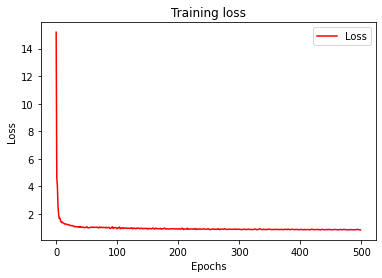

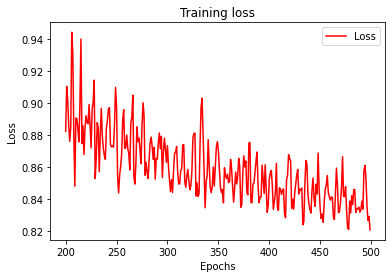

<Figure size 432x288 with 0 Axes>

In [ ]:
# — — — — — — — — — — — — — — — — — — — — — — — — — — — — — -
# Retrieve a list of list results on training and test data
# sets for each training epoch
# — — — — — — — — — — — — — — — — — — — — — — — — — — — — — -
loss=history.history["loss"]
epochs=range(len(loss)) # Get number of epochs
# — — — — — — — — — — — — — — — — — — — — — — — — 
# Plot training and validation loss per epoch
# — — — — — — — — — — — — — — — — — — — — — — — — 
plt.plot(epochs, loss, "r")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()
zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)
# — — — — — — — — — — — — — — — — — — — — — — — — 
# Plot training and validation loss per epoch
# — — — — — — — — — — — — — — — — — — — — — — — — 
plt.plot(zoomed_epochs, zoomed_loss, "r")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()

In [ ]:
def model_forecast(model, series, window_size):
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size))
 ds = ds.batch(32).prefetch(1)
 forecast = model.predict(ds)
 return forecast

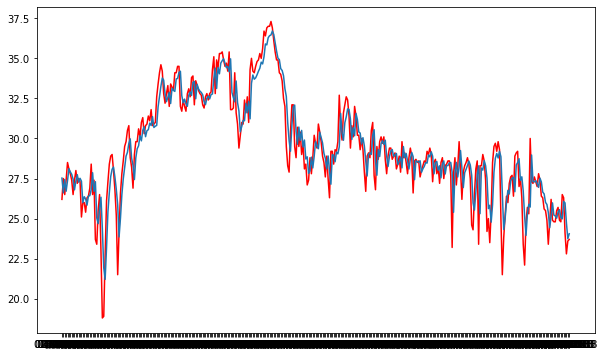

In [ ]:
rnn_forecast = model_forecast(model, df['TMAX(°C)'].to_numpy()[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[len(train) - window_size:-1, -1, 0]
plt.figure(figsize=(10, 6))
plt.plot(df.iloc[len(train):]['FECHA'], test, color='red')
plt.plot(df.iloc[len(train):]['FECHA'], rnn_forecast)
plt.show()

In [ ]:
# Guardar el Modelo
model.save(f'{root_path}/{FILES[0]}.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
#new_model = keras.models.load_model(f'{root_path}/{FILE[0]}.h5')